In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA

In [47]:
drought_df = pd.read_csv('data/train/combine.csv')
drought_df.head()

,Tanggal,Stasiun,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car,Lat,Long,El,Evaporasi,SPEI,Kategori
0,2000-01-01,96607,24.0,31.8,27.0,82.0,12.5,3.8,4.0,315.0,1.0,N,-0.48,117.16,10,0.003899,0.380887,D0
1,2000-01-02,96607,19.0,29.2,26.3,86.0,1.1,0.1,4.0,315.0,0.0,N,-0.48,117.16,10,0.004389,-0.117921,D0
2,2000-01-03,96607,23.0,31.8,27.0,86.0,0.0,5.4,3.0,360.0,0.0,N,-0.48,117.16,10,0.004141,-1.408919,D2
3,2000-01-04,96607,23.0,33.4,27.3,84.0,22.7,6.1,2.0,135.0,0.0,N,-0.48,117.16,10,0.004532,0.500791,D0
4,2000-01-05,96607,23.0,32.6,27.3,85.0,2.8,2.6,2.0,180.0,0.0,N,-0.48,117.16,10,0.004355,0.074691,D0


Data Cleaning - Missing Values

In [48]:
drought_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6809 entries, 0 to 6808
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Tanggal    6809 non-null   object 
 1   Stasiun    6809 non-null   int64  
 2   Tn         6809 non-null   float64
 3   Tx         6809 non-null   float64
 4   Tavg       6809 non-null   float64
 5   RH_avg     6809 non-null   float64
 6   RR         6809 non-null   float64
 7   ss         6809 non-null   float64
 8   ff_x       6809 non-null   float64
 9   ddd_x      6809 non-null   float64
 10  ff_avg     6809 non-null   float64
 11  ddd_car    6809 non-null   object 
 12  Lat        6809 non-null   float64
 13  Long       6809 non-null   float64
 14  El         6809 non-null   int64  
 15  Evaporasi  6809 non-null   float64
 16  SPEI       6809 non-null   float64
 17  Kategori   6809 non-null   object 
dtypes: float64(13), int64(2), object(3)
memory usage: 957.6+ KB


In [49]:
drought_df.isnull().sum()

Tanggal      0
Stasiun      0
Tn           0
Tx           0
Tavg         0
RH_avg       0
RR           0
ss           0
ff_x         0
ddd_x        0
ff_avg       0
ddd_car      0
Lat          0
Long         0
El           0
Evaporasi    0
SPEI         0
Kategori     0
dtype: int64

Remove rows without score

In [50]:
drought_df = drought_df.dropna()
drought_df = drought_df.drop('ddd_car', 1)
drought_df = drought_df.drop('Kategori', 1)
drought_df.isnull().sum()

Tanggal      0
Stasiun      0
Tn           0
Tx           0
Tavg         0
RH_avg       0
RR           0
ss           0
ff_x         0
ddd_x        0
ff_avg       0
Lat          0
Long         0
El           0
Evaporasi    0
SPEI         0
dtype: int64

Reformatting the data

In [51]:
drought_df.dtypes

Tanggal       object
Stasiun        int64
Tn           float64
Tx           float64
Tavg         float64
RH_avg       float64
RR           float64
ss           float64
ff_x         float64
ddd_x        float64
ff_avg       float64
Lat          float64
Long         float64
El             int64
Evaporasi    float64
SPEI         float64
dtype: object

Encoding the Date Object into Numbers

In [52]:
drought_df['year'] = pd.DatetimeIndex(drought_df['Tanggal']).year
drought_df['month'] = pd.DatetimeIndex(drought_df['Tanggal']).month
drought_df['day'] = pd.DatetimeIndex(drought_df['Tanggal']).day
drought_df = drought_df.drop('Tanggal', 1)

Discretization of Scores to turn the problem into Classification instead of Regression

In [53]:
drought_df['SPEI'] = drought_df['SPEI'].round().astype(int)
drought_df.dtypes

Stasiun        int64
Tn           float64
Tx           float64
Tavg         float64
RH_avg       float64
RR           float64
ss           float64
ff_x         float64
ddd_x        float64
ff_avg       float64
Lat          float64
Long         float64
El             int64
Evaporasi    float64
SPEI           int64
year           int64
month          int64
day            int64
dtype: object

In [54]:
drought_df['Stasiun'].nunique()

2

In [55]:
drought_df['SPEI'].value_counts()

-1    2809
 0    2212
 1    1256
-2     441
 2      66
-5      22
-4       3
Name: SPEI, dtype: int64

### Exploratory Data Analysis

Univariate Analysis - Descriptive statistics

In [56]:
# Descriptive statistics
display(drought_df.describe()) # For numeric columns
display(drought_df.describe(include=['object'])) # For Categorical columns
print("\nSkewness: \n", drought_df.skew(axis = 0, skipna = True))
print("\nKurtosis: \n", drought_df.kurtosis(axis = 0, skipna = True))

,Stasiun,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,Lat,Long,El,Evaporasi,SPEI,year,month,day
count,6809.000000,6809.000000,6809.000000,6809.000000,6809.000000,6809.000000,6809.000000,6809.000000,6809.000000,6809.000000,6809.000000,6809.000000,6809.000000,6809.000000,6809.000000,6809.000000,6809.000000,6809.000000
mean,96620.704509,24.256719,31.489161,27.197768,84.729769,6.975488,3.568042,5.804230,197.741959,2.034807,-0.891135,117.022955,6.310325,0.003714,-0.356146,2004.629755,6.333970,15.717286
std,12.981850,1.054567,1.774527,0.922492,4.883074,14.943488,2.676852,2.686959,92.747525,1.466666,0.389455,0.129818,3.495113,0.000607,0.925179,2.859818,3.454092,8.792997
min,96607.000000,19.000000,21.000000,23.500000,48.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.260000,116.900000,3.000000,0.000000,-5.000000,2000.000000,1.000000,1.000000
25%,96607.000000,24.000000,30.500000,26.600000,82.000000,0.000000,1.000000,4.000000,135.000000,1.000000,-1.260000,116.900000,3.000000,0.003366,-1.000000,2002.000000,3.000000,8.000000
50%,96633.000000,24.000000,31.600000,27.200000,85.000000,0.400000,3.500000,5.000000,190.000000,2.000000,-1.260000,116.900000,3.000000,0.003751,0.000000,2005.000000,6.000000,16.000000
75%,96633.000000,25.000000,32.700000,27.800000,88.000000,6.800000,5.900000,7.000000,270.000000,3.000000,-0.480000,117.160000,10.000000,0.004139,0.000000,2007.000000,9.000000,23.000000
max,96633.000000,30.000000,40.200000,31.100000,100.000000,223.000000,8.000000,26.000000,360.000000,7.000000,-0.480000,117.160000,10.000000,0.005816,2.000000,2009.000000,12.000000,31.000000


ValueError: No objects to concatenate

In [ ]:
column_list = list(drought_df.columns)
column_list

['Stasiun',
 'Tn',
 'Tx',
 'Tavg',
 'RH_avg',
 'RR',
 'ss',
 'ff_x',
 'ddd_x',
 'ff_avg',
 'ddd_car',
 'Lat',
 'Long',
 'El',
 'Evaporasi',
 'SPEI',
 'Kategori',
 'year',
 'month',
 'day']

Univariate Analysis - Distribution of continuous variables

In [ ]:
measures_column_list = ['Stasiun',
 'Tn',
 'Tx',
 'Tavg',
 'RH_avg',
 'RR',
 'ss',
 'ff_x',
 'ddd_x',
 'ff_avg',
 'ddd_car',
 'Lat',
 'Long',
 'El',
 'Evaporasi',
 'SPEI',
 'Kategori']
drought_df_measures = drought_df[measures_column_list]

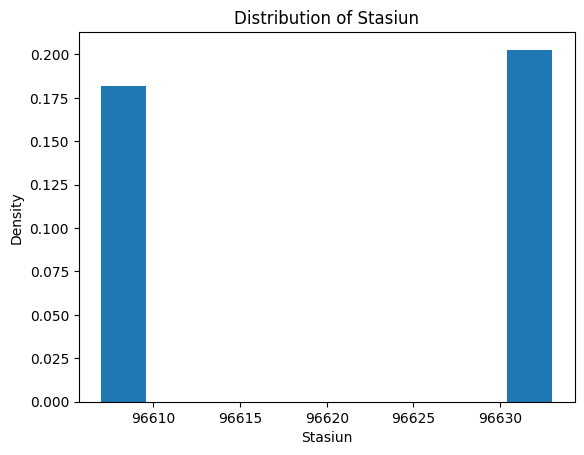

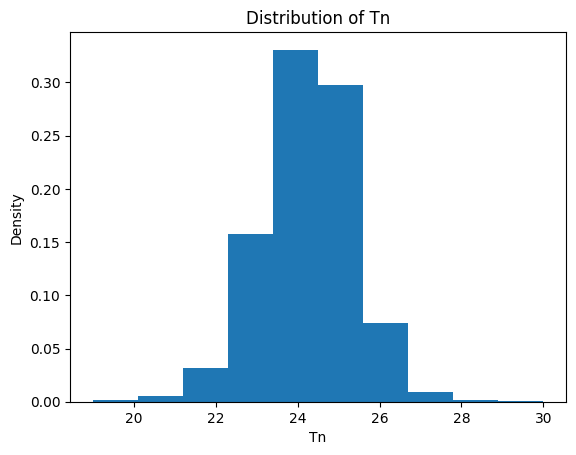

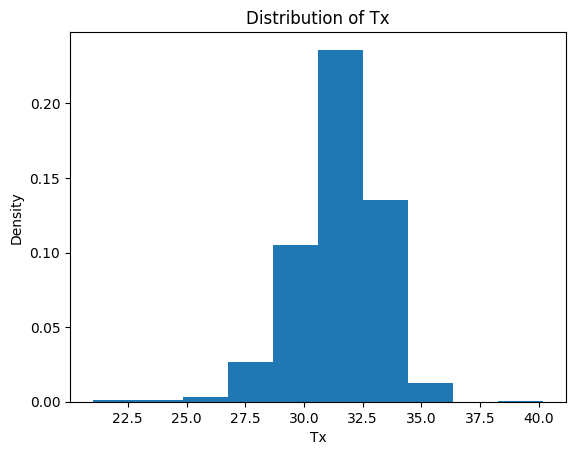

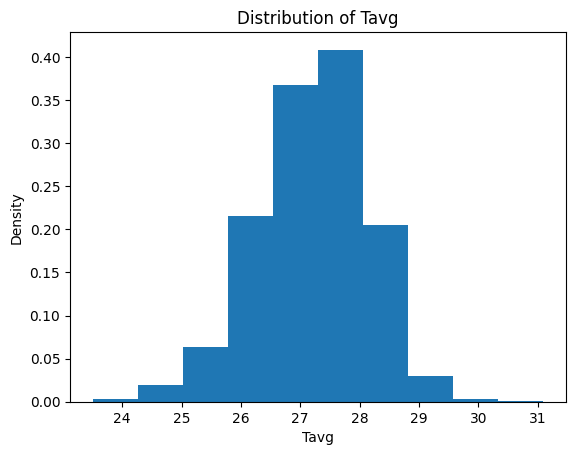

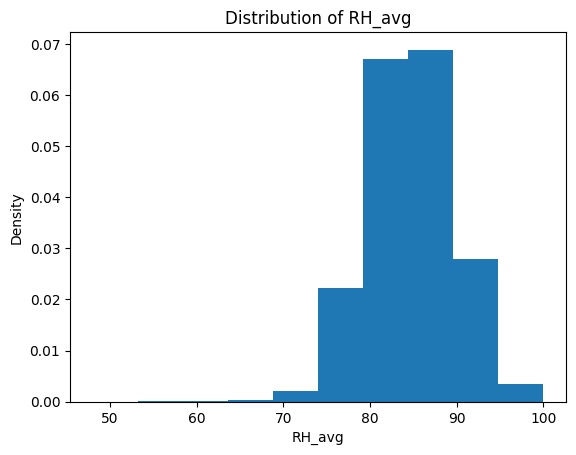

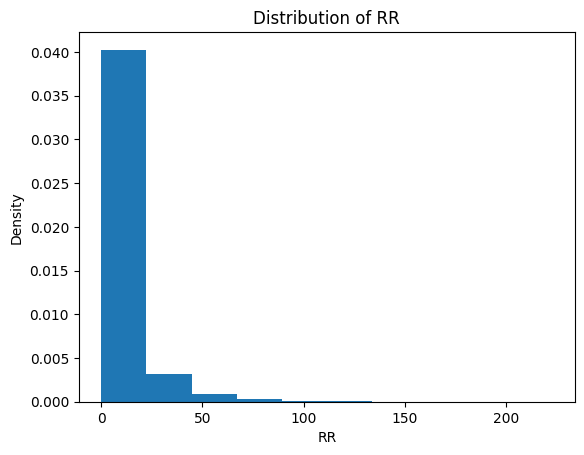

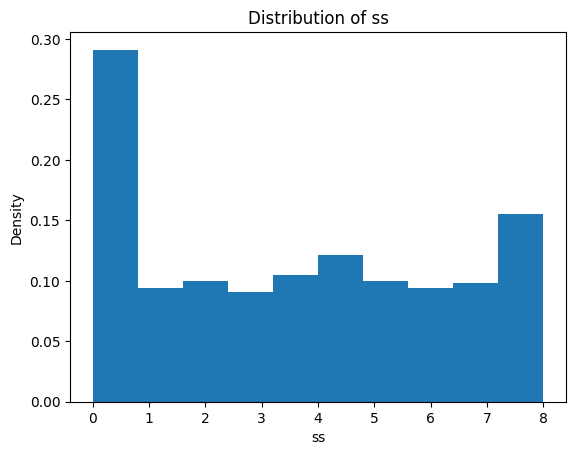

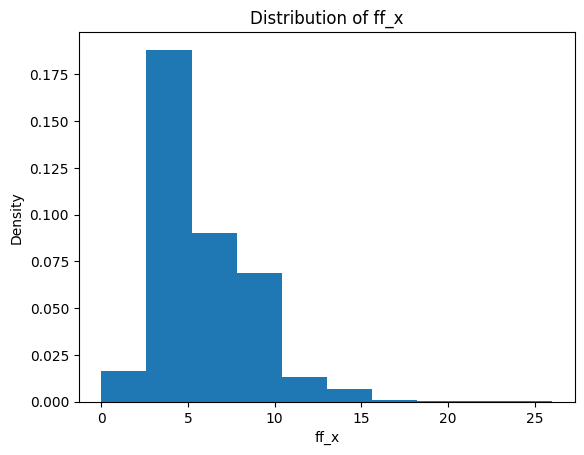

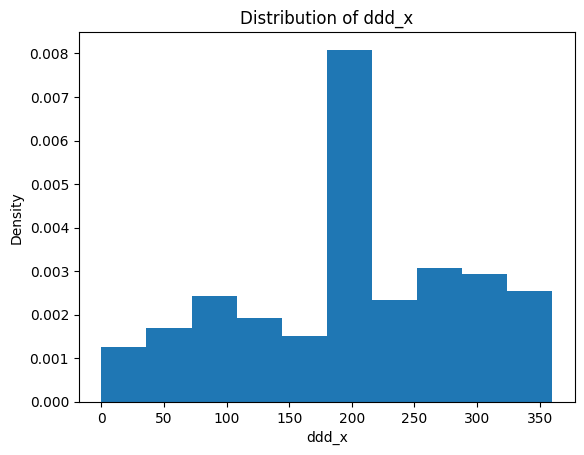

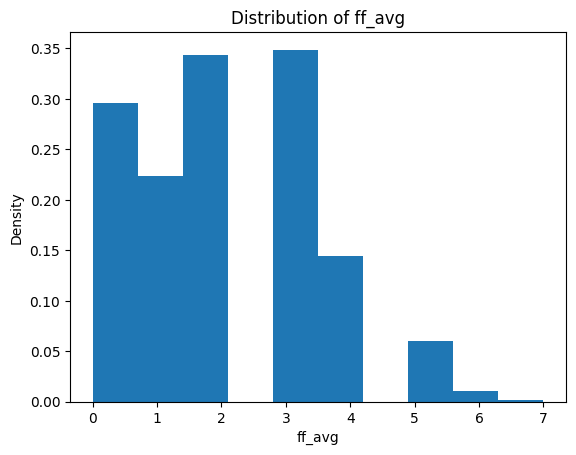

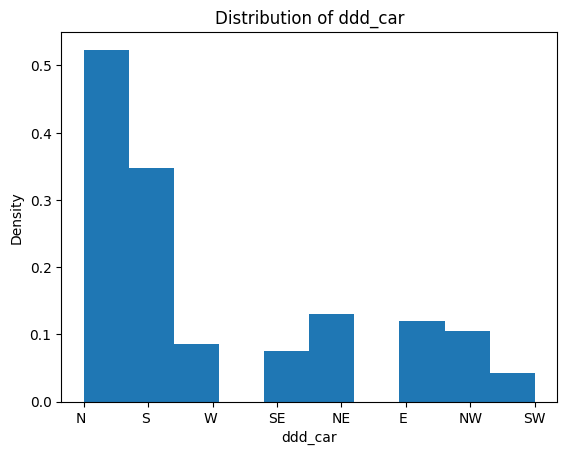

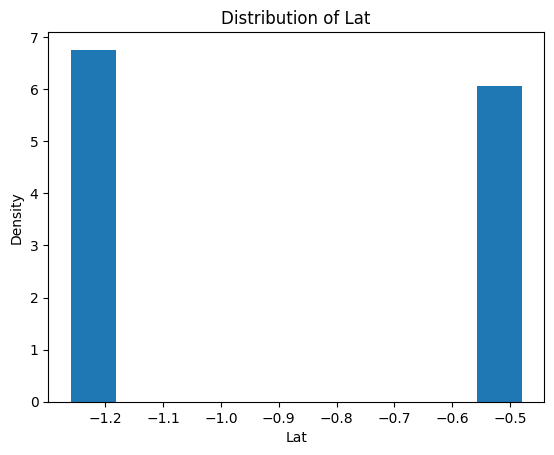

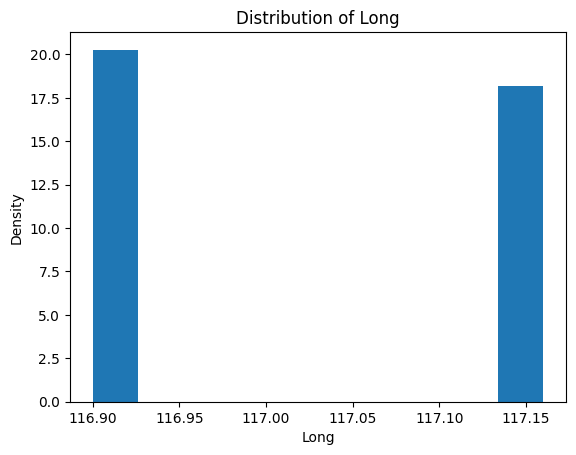

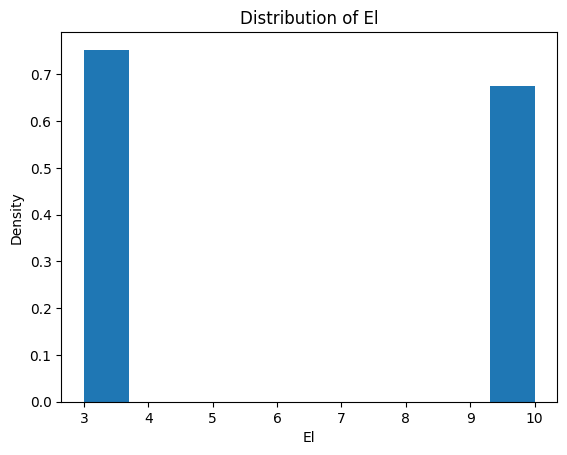

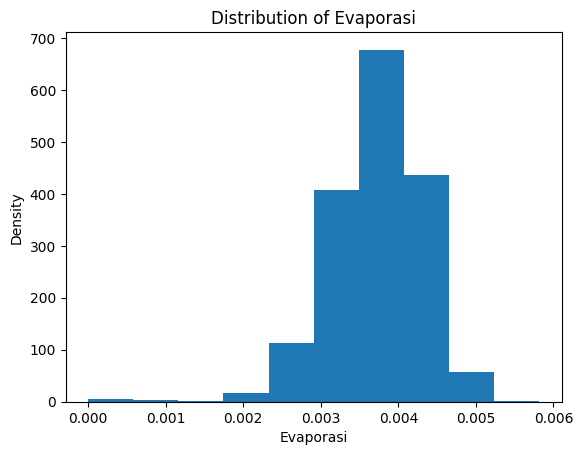

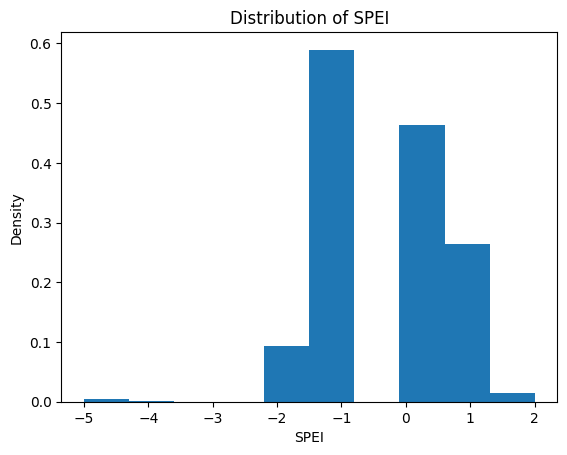

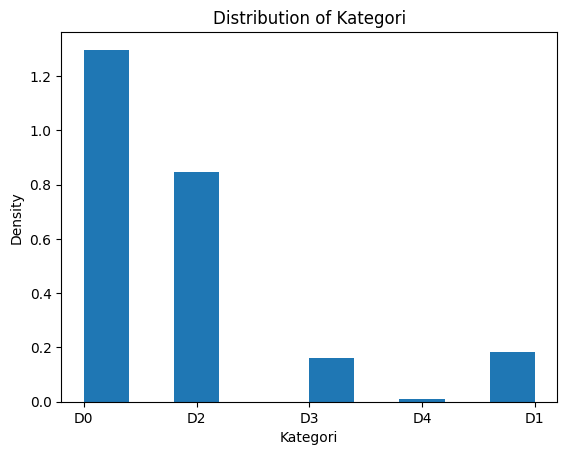

In [ ]:
for col_name in measures_column_list:
    plt.figure()
    plt.hist(drought_df_measures[col_name], density = True)
    x_name = col_name
    plt.xlabel(x_name)
    y_name = 'Density'
    plt.ylabel(y_name)
    plt.title('Distribution of {x_name}'.format(x_name=x_name))

### Outlier Treatment

Identifying Outliers

TypeError: ufunc 'divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

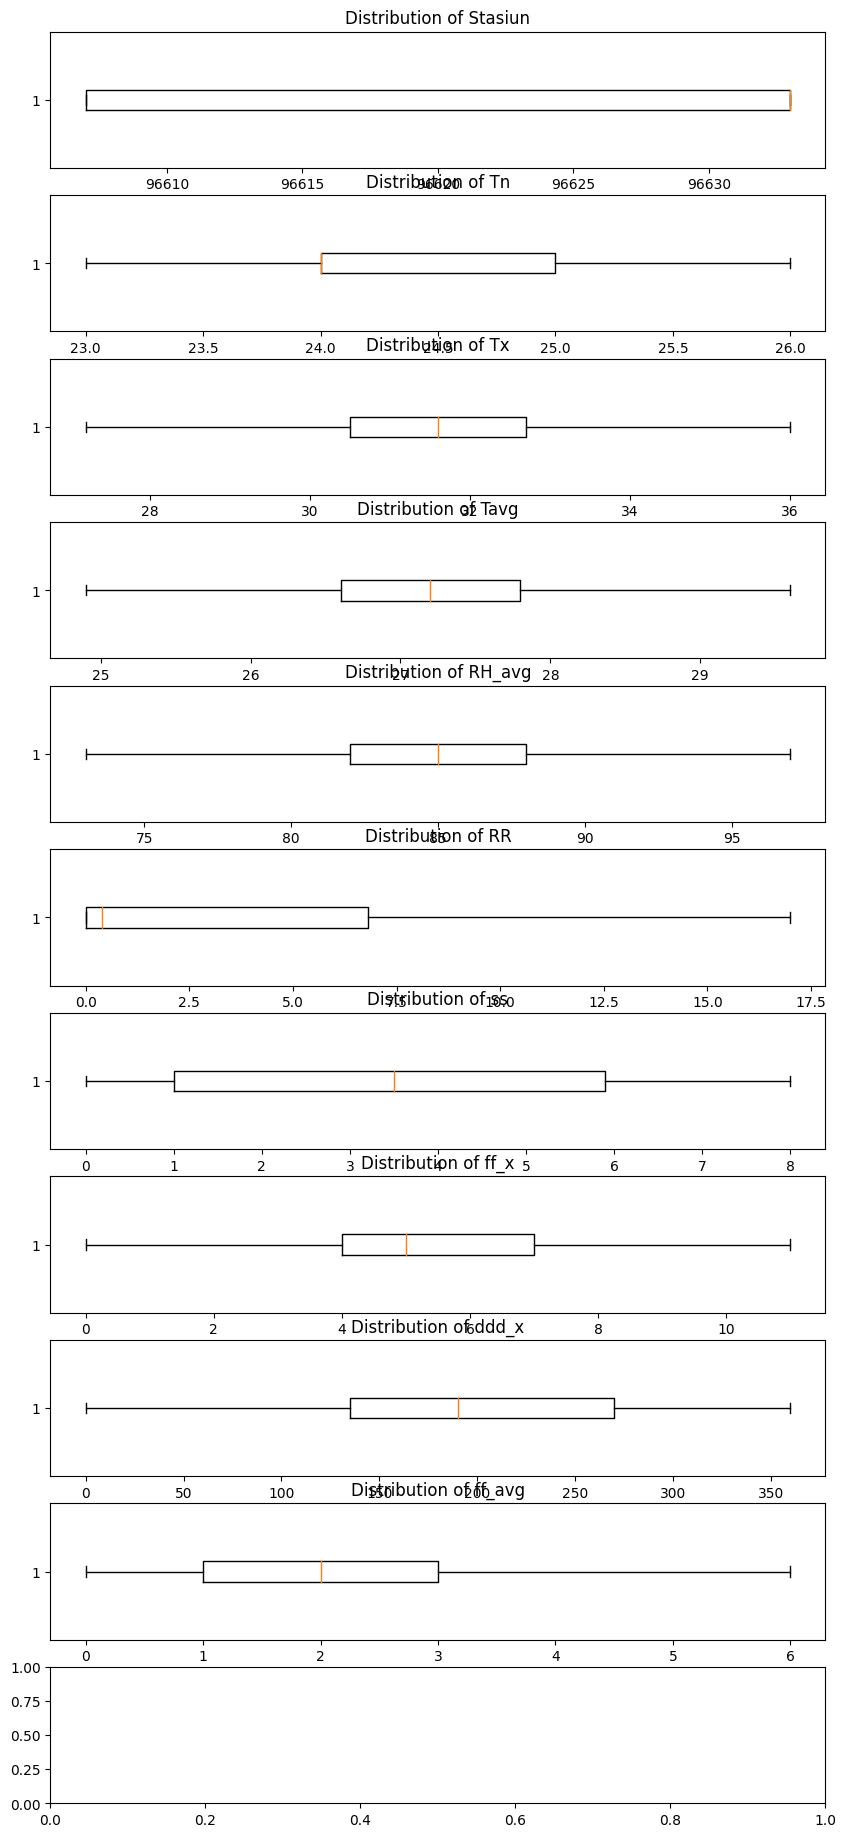

In [ ]:
plt.figure(figsize=(10,40))
for x in (range(1,19)):
    plt.subplot(19,1,x)
    plt.boxplot(x= drought_df_measures.iloc[:, x-1], vert=False, showfliers=False)
    x_name = drought_df_measures.columns[x-1]
    plt.title(f'Distribution of {x_name}')         
plt.tight_layout()

Removing Outliers

As our data is not of gaussian or normal distribution, we cannot use the standard deviation method to remove outliers. Instead we use the Inter Quartile Range to identify and remove outliers.

In [ ]:
for col_name in measures_column_list:
    q1 = drought_df[col_name].quantile(0.25)
    q3 = drought_df[col_name].quantile(0.75)
    iqr = q3-q1
    k = 1.5
    cutoff = iqr * k
    drought_df = drought_df[(drought_df[col_name] >= q1 - cutoff) & (drought_df[col_name] <= q3 + cutoff)]

print('Total rows = ',len(drought_df.index))

TypeError: unsupported operand type(s) for -: 'str' and 'str'

#### **Extracting the Feature Matrix and Target Vector**

In [62]:
independent_variables = drought_df.drop('SPEI', 1)
independent_variables = independent_variables.drop('Stasiun', 1)
independent_variables.head()

,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,Lat,Long,El,Evaporasi,year,month,day
0,24.0,31.8,27.0,82.0,12.5,3.8,4.0,315.0,1.0,-0.48,117.16,10,0.003899,2000,1,1
1,19.0,29.2,26.3,86.0,1.1,0.1,4.0,315.0,0.0,-0.48,117.16,10,0.004389,2000,1,2
2,23.0,31.8,27.0,86.0,0.0,5.4,3.0,360.0,0.0,-0.48,117.16,10,0.004141,2000,1,3
3,23.0,33.4,27.3,84.0,22.7,6.1,2.0,135.0,0.0,-0.48,117.16,10,0.004532,2000,1,4
4,23.0,32.6,27.3,85.0,2.8,2.6,2.0,180.0,0.0,-0.48,117.16,10,0.004355,2000,1,5


In [63]:
target = drought_df['SPEI']
target.head()

0    0
1    0
2   -1
3    1
4    0
Name: SPEI, dtype: int64

Train and Test Split

In [64]:
X_train, X_test, y_train, y_test = train_test_split(independent_variables, target, test_size=0.2, random_state=0)

In [65]:
print("Train features shape", X_train.shape)
print("Train target shape", y_train.shape)
print("Test features shape", X_test.shape)
print("Test target shape", y_test.shape)

Train features shape (5447, 16)
Train target shape (5447,)
Test features shape (1362, 16)
Test target shape (1362,)


Standardizing the data

In [66]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train

array([[-1.20343408, -0.11073569, -0.43530731, ...,  1.18560012,
        -0.96882511, -1.55076416],
       [-1.20343408, -0.16777373, -0.21712292, ..., -1.26603755,
         0.19240063,  0.26777751],
       [-1.20343408, -1.76483888, -2.28987469, ...,  0.13489826,
        -0.09790581,  0.83607177],
       ...,
       [ 0.71326341,  1.65744359,  0.65561467, ...,  0.13489826,
         0.7730135 , -1.32344645],
       [-0.24508533, -0.6811161 , -1.08986051, ...,  1.18560012,
        -0.67851868,  0.83607177],
       [-0.24508533,  0.97298709,  0.21924588, ...,  1.18560012,
         0.48270707,  1.29070719]])

PCA

In [67]:
pca = PCA(.90)
pca.fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)
print("Number of components after PCA: ", pca.n_components_)

Number of components after PCA:  9


KNN

We perform a grid search from n = 1 to n = 35 so that we can get the highest accuracy possible

In [69]:
knn = KNeighborsClassifier()

k_range = list(range(1, 10))
param_grid = dict(n_neighbors=k_range)

grid = GridSearchCV(knn, param_grid, scoring='accuracy', return_train_score=False,verbose=1) 
grid_search=grid.fit(X_train, y_train)

print("Most Accurate n is: ", grid_search.best_params_["n_neighbors"])

knn.set_params(n_neighbors=grid_search.best_params_["n_neighbors"])
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Most Accurate n is:  8


In [70]:
print('KNN:\n')
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))
print('Accuracy:',accuracy_score(y_test, y_pred_knn))
print('Precision:',precision_score(y_test, y_pred_knn, average='weighted'))

KNN:

[[  0   0   2   1   0   0]
 [  0  24  45  25   0   0]
 [  0  11 450  77   0   0]
 [  0  12 193 226  23   0]
 [  0   3  54  89 106   0]
 [  0   0   6   5  10   0]]
              precision    recall  f1-score   support

          -5       0.00      0.00      0.00         3
          -2       0.48      0.26      0.33        94
          -1       0.60      0.84      0.70       538
           0       0.53      0.50      0.52       454
           1       0.76      0.42      0.54       252
           2       0.00      0.00      0.00        21

    accuracy                           0.59      1362
   macro avg       0.40      0.34      0.35      1362
weighted avg       0.59      0.59      0.57      1362

Accuracy: 0.591776798825257
Precision: 0.58932107901956
